In [1]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import tempfile
import os

In [2]:
rootdir = "Cart Pendulum/Data/"
imdir = "Cart Pendulum/Images/"

In [3]:
q_true = np.load(rootdir + "q_true.npy")

In [4]:
q_pred_1e03_noise = np.load(rootdir + "q_pred_1e-03_noise.npy")
q_pred_2e02_noise = np.load(rootdir + "q_pred_2e-02_noise.npy")
q_pred_6e02_noise = np.load(rootdir + "q_pred_6e-02_noise.npy")
q_pred_1e01_noise = np.load(rootdir + "q_pred_1e-01_noise.npy")

In [5]:
t = np.arange(0,10,0.01)

In [6]:
def showCartPole(fig,ax,q,i,title,trace=True,start_trace=0):
    ax.set_xlim((-1.5, 1.5))
    ax.set_ylim((-1.5, 1.5))
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    theta = q[0,:i+1]
    x = q[1,:i+1]
    th_x = np.sin(theta)
    th_y = -np.cos(theta)
    ax.plot((x[-1],x[-1]+th_x[-1]), (0, th_y[-1]), color='k')
    ax.plot((x[-1]-0.15,x[-1]+0.15), (0, 0), linewidth=5, color='k')
    if(trace==True):
        ax.plot(x[start_trace:]+th_x[start_trace:],th_y[start_trace:])
    circle = plt.Circle((x[-1]+th_x[-1],th_y[-1]),0.1,color='k')
    ax.add_artist(circle)
    ax.title.set_text(title)

In [7]:
def show(i):
    fig= plt.figure(figsize=(9,6))
    
    ax0 = fig.add_subplot(2,3,1)
    ax0.axis('off')

    ax1 = fig.add_subplot(2,3,2)
    ax1.set_aspect(aspect=1)

    ax2 = fig.add_subplot(2,3,4)
    ax2.set_aspect(aspect=1)

    ax3 = fig.add_subplot(2,3,5)
    ax3.set_aspect(aspect=1)

    ax4 = fig.add_subplot(2,3,6)
    ax4.set_aspect(aspect=1)


    if(i>=500):
        showCartPole(fig,ax1,q_true,i,"True Model",trace=True, start_trace=500)
        showCartPole(fig,ax2,q_pred_1e03_noise,i,"xL-SINDy at $\sigma=10^{-3}$", trace=True,start_trace=500)
        showCartPole(fig,ax3,q_pred_2e02_noise,i,"xL-SINDy at $\sigma=2 \\times 10^{-2}$", trace=True,start_trace=500)
        showCartPole(fig,ax4,q_pred_6e02_noise,i,"xL-SINDy at $\sigma=6 \\times 10^{-2}$", trace=True,start_trace=500)
        ax0.text(0.5, 0.5, 'Validation Period', horizontalalignment='center',verticalalignment='center', fontsize=15)
    else:
        showCartPole(fig,ax1,q_true,i,"True Model",trace=False)
        ax0.text(0.5, 0.5, 'Training Period', horizontalalignment='center',verticalalignment='center', fontsize=15)
    
        ax2.set_xlim((-1.5, 1.5))
        ax2.set_ylim((-1.5, 1.5))
        ax2.set_xlabel('x')
        ax2.set_ylabel('y')
    
        ax3.set_xlim((-1.5, 1.5))
        ax3.set_ylim((-1.5, 1.5))
        ax3.set_xlabel('x')
        ax3.set_ylabel('y')

        ax4.set_xlim((-1.5, 1.5))
        ax4.set_ylim((-1.5, 1.5))
        ax4.set_xlabel('x')
        ax4.set_ylabel('y')

        ax2.title.set_text("xL-SINDy at $\sigma=10^{-3}$")
        ax3.title.set_text("xL-SINDy at $\sigma=2\\times10^{-2}$")
        ax4.title.set_text("xL-SINDy at $\sigma=6\\times10^{-2}$")

    fig.tight_layout()
    fig.savefig(os.path.join(imdir, '{:03d}.png'.format(i)), dpi = 400)
    plt.close(fig)



MemoryError: 

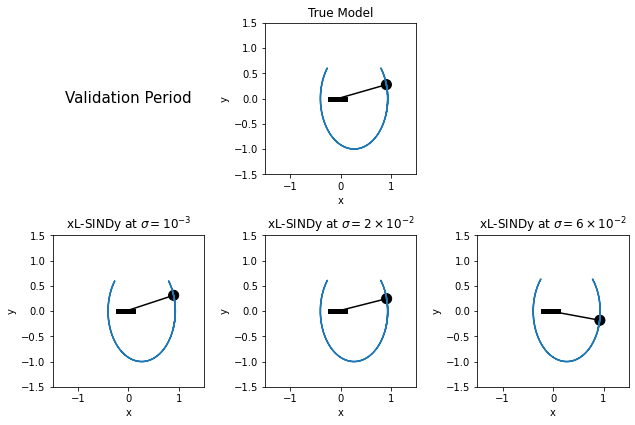

In [8]:
for i in range(t.shape[0]):
    show(i)